Импорт библиотек

In [2]:
import scipy.io
import numpy as np
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000
import matplotlib.pyplot as plt
import scipy.signal
%matplotlib widget

Импорт и обработка данных

In [3]:
data=scipy.io.loadmat('C.mat')
delta_t=float(data['smpl']) # шаг дискретизации
N=len(data['y4']) # количество измерений
I_1, I_2, I_3, I_4=data['y1'].T, data['y2'].T, data['y3'].T, data['y4'].T # интенсивности
I_1, I_2, I_3, I_4=np.reshape(I_1,N), np.reshape(I_2,N), np.reshape(I_3,N), np.reshape(I_4,N) # приведение массивов к необходимому виду
t=np.linspace(0, N*delta_t, N) # вектор действительного времени

Сглаживание интенсивностей скользящим средним

In [22]:
def ma(x, a):
    return scipy.signal.convolve(x, np.ones(a), 'same') / a
I_1s=ma(I_1,100000)
I_2s=ma(I_2,100000)
I_3s=ma(I_3,100000)

Удаление отрицательных значений $I_4$

In [5]:
I_4s=np.empty(N)
for i in range(N):
    I_4s[i]=I_4[i]
    if I_4[i]<0:
        I_4s[i]=0

Вычисление относительной фазы

In [23]:
theta=np.arctan((np.sqrt(3)*(I_1-I_2))/(2*(I_3-(I_1+I_2)/2))) # неразвернутая фаза !!

C:\Users\gleb\AppData\Local\Temp/ipykernel_7520/1161906712.py:1: RuntimeWarning: divide by zero encountered in true_divide
  theta=np.arctan((np.sqrt(3)*(I_1-I_2))/(2*(I_3-(I_1+I_2)/2))) # неразвернутая фаза !!
C:\Users\gleb\AppData\Local\Temp/ipykernel_7520/1161906712.py:1: RuntimeWarning: invalid value encountered in true_divide
  theta=np.arctan((np.sqrt(3)*(I_1-I_2))/(2*(I_3-(I_1+I_2)/2))) # неразвернутая фаза !!


Развертка фазы

In [24]:
eta=np.unwrap(theta)
eta

C:\Users\gleb\anaconda3\lib\site-packages\numpy\lib\function_base.py:1540: RuntimeWarning: invalid value encountered in remainder
  ddmod = mod(dd + pi, 2*pi) - pi


array([0.40863786, 0.52359878, 0.38025121, ...,        nan,        nan,
              nan])

Вычисление значений комплексной амплитуды и интенсивности поля

In [25]:
E=np.sqrt(I_4s)*np.exp(1j*theta)
I=abs(E)**2
E

array([0.05505978+0.02384158j, 0.04242641+0.0244949j ,
       0.04549052+0.01818275j, ..., 0.04866643+0.00561951j,
       0.04788045-0.01036642j, 0.04873749-0.00496564j])

Вычисление значений мгновенной частоты

In [26]:
w=np.empty(N)
for i in range(N-1):
    w[i]=(theta[i+1]-theta[i])/delta_t
w

array([ 5.74804603e+09, -7.16737845e+09, -6.88436663e+09, ...,
       -1.64088215e+10,  5.58402665e+09,  0.00000000e+00])

Переход к двумерным массивам

In [27]:
n_r=5125 # точек на обход
t_res=n_r*delta_t # время на обход
res=int(np.floor(N/n_r)) # количество обходов
t_array=np.linspace(0,t_res,n_r)
N_array=np.arange(0,res,1)
I_2d,E_2d,w_2d=np.empty((res,n_r)), np.empty((res,n_r)), np.empty((res,n_r))
for i in range(len(N_array)):
    for k in range(len(t_array)):
        I_2d[i][k]=I[k+n_r*i]
        E_2d[i][k]=E[k+n_r*i]
        w_2d[i][k]=w[k+n_r*i]

C:\Users\gleb\AppData\Local\Temp/ipykernel_7520/2375330705.py:10: ComplexWarning: Casting complex values to real discards the imaginary part
  E_2d[i][k]=E[k+n_r*i]


График

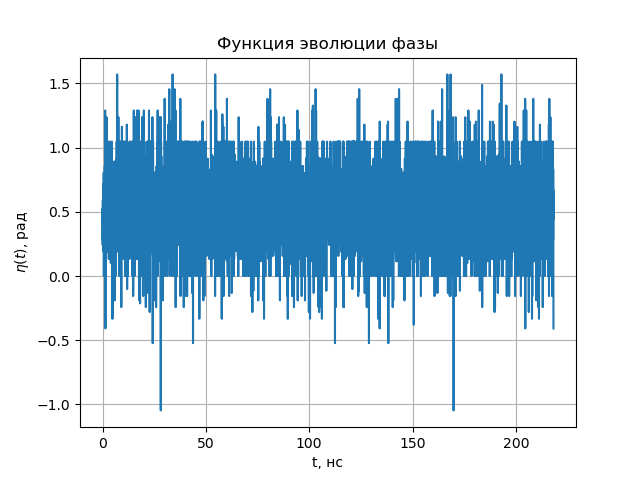

In [28]:
plt.figure(1)
#plt.rcParams["axes.titlesize"]=10
plt.title('Функция эволюции фазы')
plt.xlabel('t, нс')
plt.ylabel('$\eta(t)$, рад')
plt.plot(t*10**9, eta)
#plt.plot(t*10**9, I_1s, label='$\theta$')
#plt.plot(t, I_2, 'b-', label='$I_2$')
#plt.plot(t, I_3, 'y-', label='$I_3$')
#plt.plot(t, I_4, 'g-', label='$I_4$')
#plt.legend(loc='best')
plt.grid()
plt.savefig('eta.png',dpi=600)
plt.show()

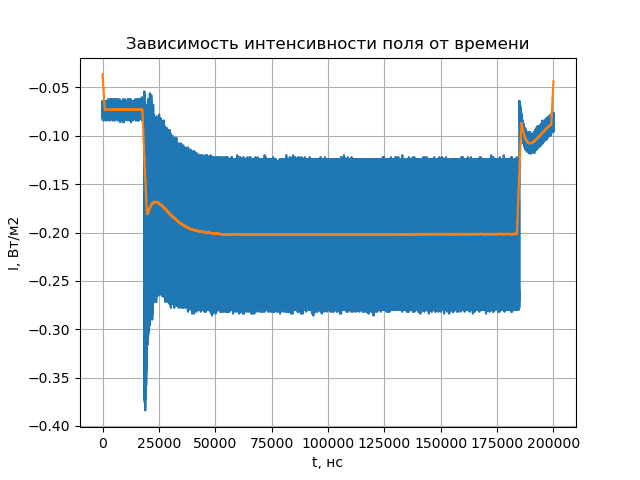

In [29]:
plt.figure(2)
plt.clf()
plt.grid()
plt.title('Зависимость интенсивности поля от времени')
plt.xlabel('t, нс')
plt.ylabel('I, Вт/м2')
plt.plot(t*10**9, I_1)
plt.plot(t*10**9, I_1s)
plt.savefig('I.png',dpi=600)
plt.show()

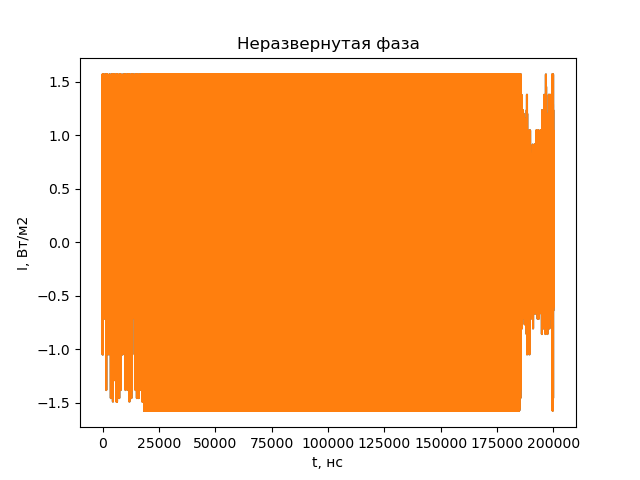

In [30]:
plt.figure(3)
plt.grid()
plt.title('Неразвернутая фаза')
plt.xlabel('t, нс')
plt.ylabel('I, Вт/м2')
plt.plot(t*10**9, theta)
plt.savefig('theta.png',dpi=600)
plt.show()

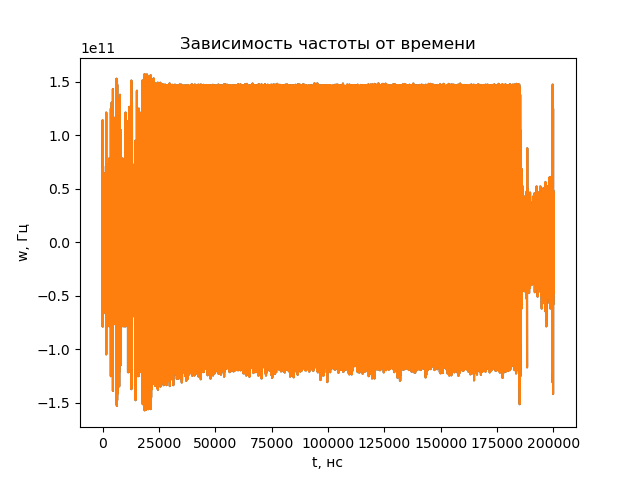

In [31]:
plt.figure(4)
plt.grid()
plt.title('Зависимость частоты от времени')
plt.xlabel('t, нс')
plt.ylabel('w, Гц')
plt.plot(t*10**9, w)
plt.savefig('w.png',dpi=600)
plt.show()

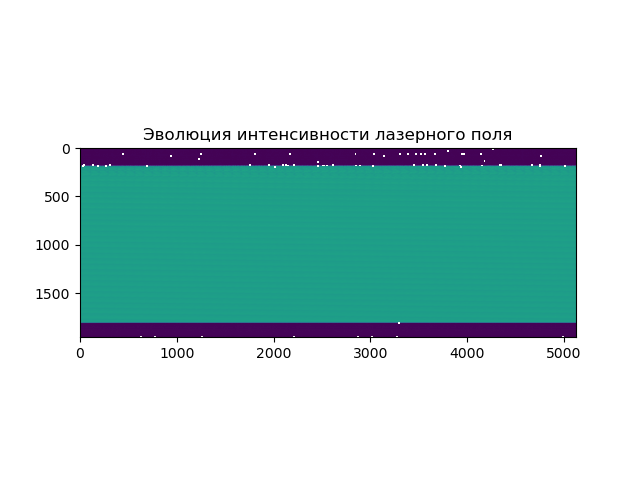

In [32]:
plt.figure(5)
plt.clf()
plt.title('Эволюция интенсивности лазерного поля')
plt.imshow(I_2d)
plt.show()

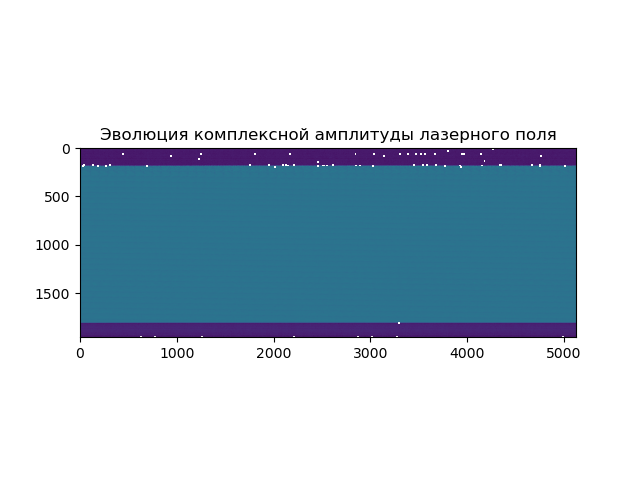

In [33]:
plt.figure(6)
plt.clf()
plt.title('Эволюция комплексной амплитуды лазерного поля')
plt.imshow(E_2d.real)
plt.show()

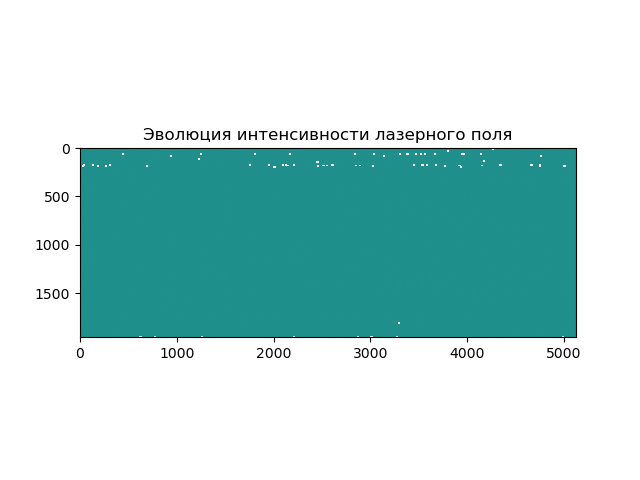

In [34]:
plt.figure(7)
plt.clf()
plt.title('Эволюция интенсивности лазерного поля')
plt.imshow(w_2d)
plt.show()